# Text Mining
## Sentiment Analysis

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings                                               #To ignore all the future warnings
warnings.filterwarnings('ignore')

import re                                                     #for importing regular expression
import string
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer

from nltk.stem.porter import PorterStemmer

In [20]:
import chardet

#To detect the encoding of CSV file
with open('Elon_musk.csv','rb') as f:
  result = chardet.detect(f.read())

print(result['encoding'])

Windows-1252


In [21]:
tweets=pd.read_csv('Elon_musk.csv',encoding='Windows-1252')
tweets

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [22]:
tweets.shape

(1999, 2)

In [23]:
tweets['Text'].duplicated().value_counts()

Text
False    1997
True        2
Name: count, dtype: int64

In [24]:
# Identify duplicate values in the 'Text' column
duplicates = tweets[tweets['Text'].duplicated(keep=False)]
print(duplicates)
# Get the index numbers of the duplicates
duplicate_indices = duplicates.index
# Print the index numbers
print(duplicate_indices)


     Unnamed: 0                                              Text
9            10  The most entertaining outcome is the most likely
139         140                             @westcoastbill Indeed
324         325  The most entertaining outcome is the most likely
655         656                             @westcoastbill Indeed
Index([9, 139, 324, 655], dtype='int64')


In [25]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1999 non-null   int64 
 1   Text        1999 non-null   object
dtypes: int64(1), object(1)
memory usage: 31.4+ KB


In [26]:
tweets.drop(['Unnamed: 0'],axis=1,inplace=True)
tweets.head()

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...


In [27]:
#importing stopwords

with open("stop.txt",'r') as file:
  stop_words=set(file.read().splitlines())
stop_words

{'a',
 "a's",
 'able',
 'about',
 'above',
 'according',
 'accordingly',
 'across',
 'actually',
 'after',
 'afterwards',
 'again',
 'against',
 "ain't",
 'all',
 'allow',
 'allows',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'an',
 'and',
 'another',
 'any',
 'anybody',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anyways',
 'anywhere',
 'apart',
 'appear',
 'appreciate',
 'appropriate',
 'are',
 "aren't",
 'around',
 'as',
 'aside',
 'ask',
 'asking',
 'associated',
 'at',
 'available',
 'away',
 'awfully',
 'b',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'believe',
 'below',
 'beside',
 'besides',
 'best',
 'better',
 'between',
 'beyond',
 'both',
 'brief',
 'but',
 'by',
 'c',
 "c'mon",
 "c's",
 'came',
 'can',
 "can't",
 'cannot',
 'cant',
 'cause',
 'causes',
 'certain',
 'certainly',
 'changes',
 'clearly',
 'co',
 'com',
 'come',
 'c

In [28]:
import chardet

#To detect the encoding of txt file
with open('negative-words.txt','rb') as f:
  result = chardet.detect(f.read())

print(result['encoding'])

ISO-8859-1


In [29]:
#importing negative words

with open("negative-words.txt",'r',encoding='ISO-8859-1') as file:
  negative_words=set(file.read().splitlines())
negative_words



# Create a dictionary where each negative word is a key with a value of -1
negative_word_scores = {word: -1 for word in negative_words}

# Print the resulting dictionary
print(negative_word_scores)


{'': -1, 'offender': -1, 'apologists': -1, 'hustler': -1, 'unilateralism': -1, 'maliciousness': -1, ';          (editors: N. Indurkhya and F. J. Damerau), 2010.': -1, 'bullyingly': -1, 'cringed': -1, 'infidel': -1, 'misdirection': -1, 'frightfully': -1, 'miseries': -1, 'vengefully': -1, 'sufferer': -1, 'confined': -1, 'implication': -1, 'creak': -1, 'mistake': -1, 'inconsequent': -1, 'extortion': -1, 'disgustfully': -1, 'ruin': -1, 'reckless': -1, 'streaky': -1, 'anemic': -1, 'embarrass': -1, 'grudgingly': -1, 'predicament': -1, 'anarchy': -1, 'perturb': -1, 'doldrums': -1, 'obsessively': -1, 'fiendish': -1, 'hysterically': -1, 'scorching': -1, 'uproariously': -1, 'hinder': -1, 'unexpected': -1, 'lapses': -1, 'cunt': -1, 'sunder': -1, 'tyrannically': -1, 'oppression': -1, 'unrest': -1, 'imprecisely': -1, 'lackey': -1, 'symptom': -1, 'ignominy': -1, 'blundering': -1, 'petrified': -1, 'sink': -1, 'ulterior': -1, 'profane': -1, 'desperation': -1, 'disappointing': -1, 'outbreak': -1, 'matt

In [30]:
#importing positive words

with open("positive-words.txt",'r') as file:
  positive_words=set(file.read().splitlines())
positive_words


# Create a dictionary where each positive word is a key with a value of +1
positive_word_scores = {word: +1 for word in positive_words}

# Print the resulting dictionary
print(positive_word_scores)

{'': 1, 'enticingly': 1, 'freshest': 1, ';          (editors: N. Indurkhya and F. J. Damerau), 2010.': 1, 'treasure': 1, 'complimentary': 1, 'entertain': 1, 'passionately': 1, 'supporter': 1, 'breakthrough': 1, 'enjoy': 1, 'ebullience': 1, 'attraction': 1, 'agreeable': 1, 'credence': 1, 'courage': 1, 'likable': 1, 'openly': 1, 'support': 1, 'unselfish': 1, 'exellent': 1, 'award': 1, 'respectable': 1, 'self-determination': 1, 'auspicious': 1, 'purify': 1, 'first-class': 1, 'sagacity': 1, 'tough': 1, 'revelation': 1, 'avidly': 1, 'reliably': 1, 'indulgence': 1, 'persevere': 1, 'versatile': 1, 'audibly': 1, 'breeze': 1, 'abundant': 1, 'obsessions': 1, 'best-known': 1, 'conscientious': 1, 'favorable': 1, 'titillate': 1, 'dote': 1, 'titillating': 1, 'well-known': 1, 'advantages': 1, 'valiantly': 1, 'luck': 1, 'clarity': 1, 'erudite': 1, 'delightfully': 1, 'god-send': 1, 'love': 1, 'clean': 1, 'spectacular': 1, 'liked': 1, 'incredibly': 1, 'fragrant': 1, 'agilely': 1, 'credible': 1, 'accompl

### Data Preprocessing:<br>


In [31]:
#defining a function for cleaning of the data

def preprocessing(text):

  text=text.lower()                                                             #for converting text into lower case

  text=re.sub('[^a-z:) ]','',text)                                              #regular expressions substituting with " "-null character
                                                                                #[^a-z:) ] It defines a character class that matches any character that is not a lowercase letter (a-z), a colon (:) or a space ( )
                                                                                # ^ at the beginning of the character class inverts the match

  text=text.split()                                                             #spliting the text by blank space

  text=[PorterStemmer().stem(word) for word in text if word not in stop_words]  #stemming of words
                                                                                #list (text) containing stemmed versions of the words from the original list (text), with stop_words removed.

  text=" ".join(text)                                                           #the result will be a single string where the stemmed words from the original list are combined into a sentence of text, with spaces between them.

  return text

In [32]:
tweets['Text']=tweets['Text'].apply(preprocessing)

In [33]:
#Cleaned data with no regular expression no stopwords
tweets

,Text
0,kunalb im alien
1,idaacarmack ray trace cyberpunk hdr nextlevel
2,joerogan spotifi great interview
3,gtera doge underestim
4,teslacn congratul tesla china amaz execut year
...,...
1994,flcnhvi true sound surreal neg propaganda amp ...
1995,ppathol make read ur term amp condit click accept
1996,teslagong ppathol samwis gamge
1997,ppathol altho dumb dumber ufuf


## Sentiment Analysis

In [34]:
import nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer   #For sentiment analysis

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\MEGHA\AppData\Roaming\nltk_data...


*
Polarity refers to the overall sentiment conveyed by a particular text, phrase or word. This polarity can be expressed as a numerical rating known as a “sentiment score”. For example, this score can be a number between -100 and 100 with 0 representing neutral sentiment.

In [35]:
#Sentiment Analysis

#initial the sentiment analyzer
analyzer=SentimentIntensityAnalyzer()


#function to analyze the sentiment
def analyze_sentiment(text):
  sentiment_score=analyzer.polarity_scores(text)

  if sentiment_score['compound']>= 0.05:
    return 'Positive'
  elif sentiment_score['compound']<= -0.05:
    return 'Negative'
  else:
    return 'Neutral'

#apply sentiment analysis to each row of the dataframe
tweets['Sentiment']=tweets['Text'].apply(analyze_sentiment)
tweets

,Text,Sentiment
0,kunalb im alien,Neutral
1,idaacarmack ray trace cyberpunk hdr nextlevel,Neutral
2,joerogan spotifi great interview,Positive
3,gtera doge underestim,Neutral
4,teslacn congratul tesla china amaz execut year,Neutral
...,...,...
1994,flcnhvi true sound surreal neg propaganda amp ...,Positive
1995,ppathol make read ur term amp condit click accept,Positive
1996,teslagong ppathol samwis gamge,Neutral
1997,ppathol altho dumb dumber ufuf,Negative


<Axes: xlabel='Sentiment', ylabel='count'>

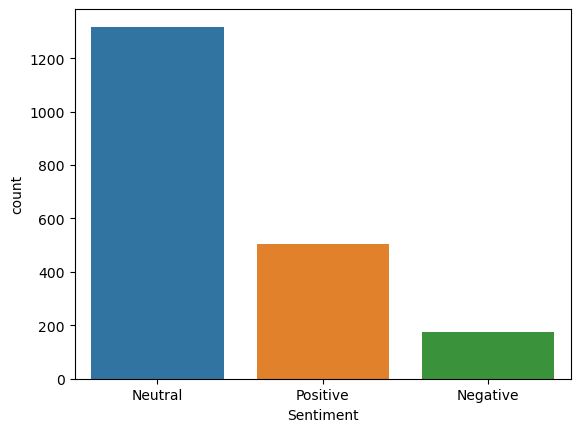

In [36]:
sns.countplot(x='Sentiment',data=tweets)

In [37]:
tweets.drop('Sentiment', axis=1, inplace=True)

In [38]:
# combining sentiment_scores dictionary that includes both positive and negative word scores.


sentiment_scores = {}
sentiment_scores.update(positive_word_scores)
sentiment_scores.update(negative_word_scores)
#sentiment_scores

In [39]:
def calculate_review_sentiment(review, sentiment_scores):
    tokens = review.split()
    positive_score = 0
    negative_score = 0
    is_negation = False

    for token in tokens:
        if token in sentiment_scores:
            if is_negation:
                negative_score += sentiment_scores[token]
            else:
                positive_score += sentiment_scores[token]
        elif token in ["not", "no", "never"]:
            is_negation = not is_negation

    total_sentiment = positive_score - negative_score

    return total_sentiment



# Add a new column "Sentiment Score" to the DataFrame and calculate scores
tweets['Sentiment_Score'] = tweets['Text'].apply(lambda x: calculate_review_sentiment(x, sentiment_scores))

# Display the DataFrame with the added "Sentiment Score" column
tweets


,Text,Sentiment_Score
0,kunalb im alien,0
1,idaacarmack ray trace cyberpunk hdr nextlevel,0
2,joerogan spotifi great interview,1
3,gtera doge underestim,0
4,teslacn congratul tesla china amaz execut year,0
...,...,...
1994,flcnhvi true sound surreal neg propaganda amp ...,0
1995,ppathol make read ur term amp condit click accept,0
1996,teslagong ppathol samwis gamge,0
1997,ppathol altho dumb dumber ufuf,-1


In [40]:
calculate_review_sentiment('progress updat august', sentiment_scores)

1

In [41]:
calculate_review_sentiment('idaacarmack ray trace cyberpunk hdr nextleve', sentiment_scores)

0

<Axes: xlabel='Sentiment_Score', ylabel='count'>

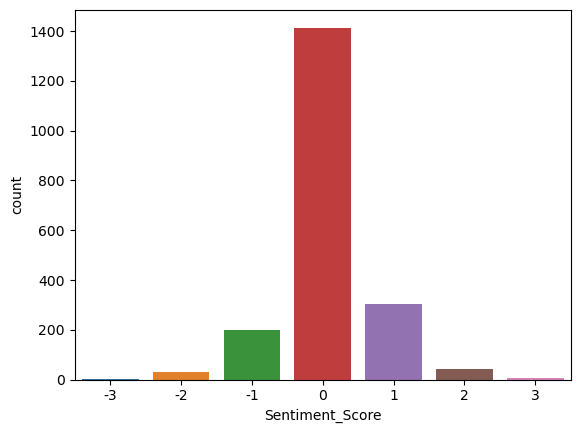

In [42]:
sns.countplot(x='Sentiment_Score',data=tweets)

### Word Cloud

An image composed of words used in a particular text or subject, in which the size of each word indicates its frequency or importance.

In [43]:
pos=tweets[tweets['Sentiment_Score']==1]
pos_list=pos['Text'].tolist()
neg=tweets[tweets['Sentiment_Score']==-1]
neg_list=neg['Text'].tolist()

In [44]:
pos_all=''.join([word for sent in pos_list for word in sent])
neg_all=''.join([word for sent in neg_list for word in sent])

In [45]:
from wordcloud import WordCloud

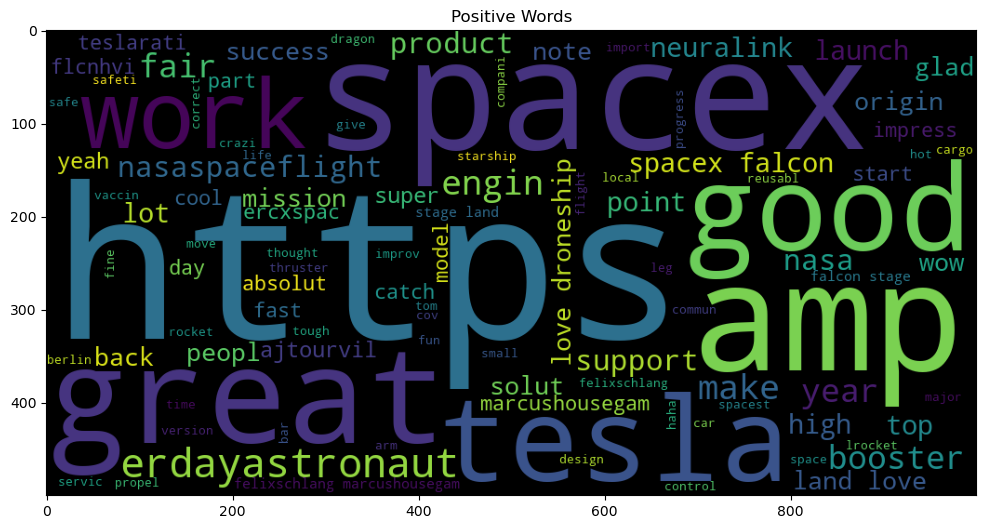

In [46]:
WordCloud()
wordcloud=WordCloud(width=1000,height=500,max_words=100,background_color='black').generate(pos_all)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.title('Positive Words')
plt.show()

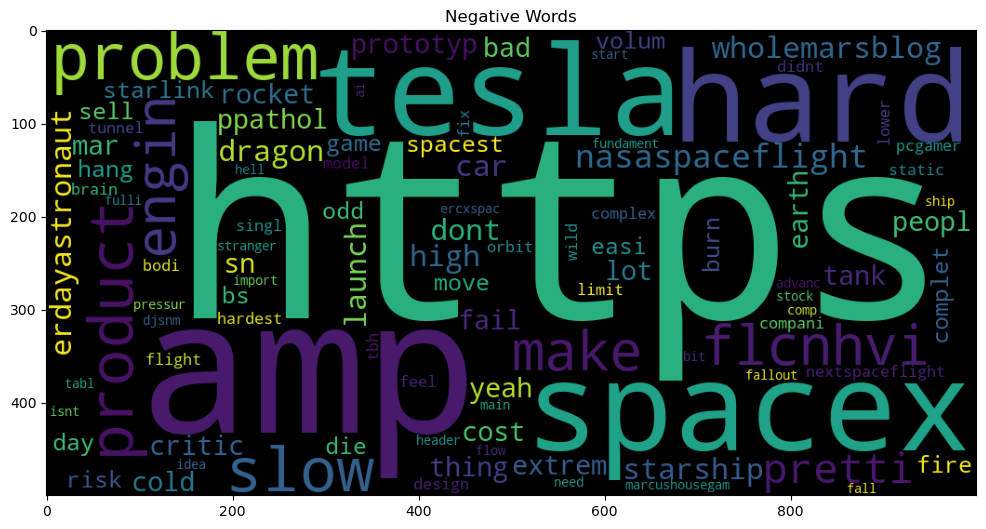

In [47]:
WordCloud()
wordcloud=WordCloud(width=1000,height=500,max_words=100,background_color='black').generate(neg_all)
plt.figure(figsize=(12,12))
plt.imshow(wordcloud)
plt.title('Negative Words')
plt.show()